![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 004 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 08/09/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0004Part002.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import make_s_curve, make_swiss_roll

# Computer Vision

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

DATA_FILE_URL   = r'None'
DATA_FILE_NAME  = r'None'

TOTAL_RUN_TIME = 30 #<! Don't touch it!


In [4]:
# Auxiliary Functions

def GetData(MakeData: Callable, Nx: int, Ny: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    mX, vCx = MakeData(Nx)
    mY, vCy = MakeData(Ny)
    
    return mX, mY, vCx, vCy

def PlotTrainTestData(mX: np.ndarray, mY: np.ndarray, vCx: np.ndarray, vCy: np.ndarray, hA: plt.Axes, Is3DData: bool = False) -> None:
    m = mX.min()
    M = mX.max()
    
    hA.scatter(*mX.T, s = 25, c = vCx, edgecolor = 'k', alpha = 1, label = 'Train', vmin = vCx.min(), vmax = vCx.max())
    hA.scatter(*mY.T, s = 100, c = 'r', marker = '*', alpha = 1, label = 'Test')
    hA.set_xlim([m, M])
    hA.set_ylim([m, M])
    if Is3DData:
        hA.set_zlim([m, M])
    hA.set_xlabel('$x_1$')
    hA.set_ylabel('$x_2$')
    if Is3DData:
        hA.set_zlabel('$x_3$')
    hA.legend()

In [5]:
def Plot2DScatter(mX: np.ndarray, hA: plt.Axes, vC: np.ndarray = None) -> None:
    m = mX.min()
    M = mX.max()
    if vC is not None:
        hA.scatter(*mX.T, s = 50,  c = vC, edgecolor = 'k', alpha = 1)
    else:
        hA.scatter(*mX.T, s = 50,  c = 'lime', edgecolor = 'k', alpha = 1)
    hA.set_xlim([m, M])
    hA.set_ylim([m, M])
    hA.set_xlabel('$x_1$')
    hA.set_ylabel('$x_2$')

## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Don't use `pip install` on the submitted notebook!  
   If you need a package that is not imported above use **the dedicated cell**.  
   Comment what do you need the package for and the version needed.
 - If you need functions from previous notebook copy them into a file called `AuxFun.py`.  
   Import the function in the dedicated cell.
 - Submission in groups (Single submission per group).
 - The submission files should have the format: `<fileName>_GRP_<#>`.  
   For instance, `Exercise001Part002_GRP_A.ipynb` or `AuxFun_GRP_A.py`.
 - You may and _should_ use the forums for questions.
 - Good Luck!

<font color='red'>Total run time must be **less than `TOTAL_RUN_TIME` seconds**</font>.

In [6]:
# Run Time
print(f'The total run time must not exceed: {TOTAL_RUN_TIME} [Sec]')
startTime = time.time()

The total run time must not exceed: 30 [Sec]


* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.

## Team Members

 - `Ori_Blanka_208994764`.
 - `Or_Benson_308577345`.
 - `Alon_Hertz_315682773`

In [7]:
# Students Packages to Import
# If you need a package not listed above, use this cell
# Do not use `pip install` in the submitted notebook

from scipy.spatial import distance_matrix
from scipy.sparse.linalg import eigsh 

## Generate / Load Data

In [8]:
# Download Data
# This section downloads data from the given URL if needed.

if (DATA_FILE_NAME != 'None') and (not os.path.exists(DATA_FILE_NAME)):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

## 7. MDS

### 7.1. Classic MDS Algorithm

In this section we'll implement a SciKit Learn API compatible class for the Classic MDS.  

The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
2. `fit()` - Given a data set ($\boldsymbol{D}_{xx}$) builds the encoder.  
3. `transform()` - Applies the encoding on the input data ($\boldsymbol{D}_{xy}$) in out of sample manner.  
4. `fix_transform()` - Given a data set ($\boldsymbol{D}_{xx}$) builds the encoder and applies the encoding.  

* <font color='brown'>(**#**)</font> Pay attention to data structure (`Nx x Nx` / `Nx x Ny`).
* <font color='brown'>(**#**)</font> Do not use any loops in you implementation.

In [9]:
class CMDS():
    def __init__(self, d: int = 2):
        '''
        Constructing the object.
        Args:
            d - Number of dimensions of the encoder output.
        '''
        # Initialize model parameters
        self.d = d

    def fit(self, mDxx: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mDxx - Input data (Distance matrix) with shape Nx x Nx.
        Output:
            self
        '''
        # Build the model encoder
        # Centerize the given distance matrix to obtain the kernel matrix mK
        self.mDxx = mDxx
        self.n_samples = mDxx.shape[0]
        mDxx_rows_mean = np.divide(np.sum(mDxx, axis=1), self.n_samples)
        mKxx = mDxx - mDxx_rows_mean[:, np.newaxis]
        mKxx_cols_mean = np.divide(np.sum(mKxx, axis=0), self.n_samples)
        mKxx = mKxx - mKxx_cols_mean
        self.mKxx = -0.5 * mKxx

        # Compute the EVD for mK
        eigenvalues, eigenvectors = eigsh(self.mKxx, k=self.d)
        self.mVd = eigenvectors
        self.mSd = np.diag(np.sqrt(eigenvalues))
        self.mVTd = eigenvectors.transpose()

        return self

    def transform(self, mDxy: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) encoding.
        Args:
            mDxy - Input data (Distance matrix) with shape Nx x Ny.
        Output:
            mZ - Low dimensional representation (embeddings) with shape Ny x d.
        '''
        # Encode data using the model encoder
        # Compute the mean of mDxx rows
        mDxx_rows_mean = np.divide(np.sum(self.mDxx, axis=1), self.n_samples)
        # Substract the mean of mDxx rows from mDxy's rows
        mKxy = mDxy - mDxx_rows_mean[:, np.newaxis]
        # Centerize mKxy's colums to obtain the final kernel matrix
        mKxy_cols_mean = np.divide(np.sum(mKxy, axis=0), self.n_samples)
        mKxy = mKxy - mKxy_cols_mean
        mKxy = -0.5 * mKxy

        # Multiply by mSd and mVTd to get the embeddings of the OOS data
        mZstar = np.transpose(np.matmul(np.matmul(np.linalg.inv(self.mSd), self.mVTd), mKxy))

        return mZstar

    def fit_transform(self, mDxx: np.ndarray) -> np.ndarray:
        '''
        Applies encoding on the input.
        Args:
            mDxx - Input data (Distance matrix) with shape Nx x Nx.
        Output:
            mZ - Low dimensional representation (embeddings) with shape Nx x d.
        '''
        # Encode data using the model encoder
        self.fit(mDxx)
        mZ = np.transpose(np.matmul(self.mSd, self.mVTd))

        return mZ


* <font color='red'>(**?**)</font> Will `fit()` and then `transform()` will match the result of `fit_transform()`?  
  Make sure you understand this before proceeding.

### 7.2. Metric MDS Algorithm

In this section we'll implement a SciKit Learn API compatible class for the Metric MDS.  
The implementation will assume the distance matrix is generated using the _Eculidean_ distance (**Not _Squared Euclidean_**).  
The solver will use the Majorization Minimization algorithm.

The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
2. `fit()` - Given a data set ($\boldsymbol{D}_{xx}$) initializes the data structures.  
3. `fit_transform()` - Given a data set ($\boldsymbol{D}_{xx}$) builds the encoder and applies the encoding.  

* <font color='brown'>(**#**)</font> Pay attention to data structure (`Nx x Nx` / `Nx x Ny`).
* <font color='brown'>(**#**)</font> Do not use any loops in you implementation beside the main MM loop.
* <font color='brown'>(**#**)</font> Think about the difference in `transform()` and `fit_transform()` compared to `CMDS()` above.

In [10]:
class MMDS():
    def __init__(self, d: int = 2, maxIter=500, ε=1e-6):
        '''
        Constructing the object.
        Args:
            d       - Number of dimensions of the encoder output.
            maxIter - Maximum number of iterations for Majorization Minimization.
            ε       - Convergence threshold.
        '''
        # Initialize model parameters
        self.d = d
        self.maxIter = maxIter
        self.ε = ε

    def fit(self, mDxx: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mDxx - Input data (Distance matrix) with shape Nx x Nx.
        Output:
            self
        '''
        # Build the model encoder
        self.n_samples = mDxx.shape[0]
        
        # Apply Classical MDS to obtain the initial configuration
        self.mZ0 = CMDS(d=self.d).fit_transform(mDxx)
        return self

    def fit_transform(self, mDxx: np.ndarray) -> np.ndarray:
        '''
        Applies encoding on input data.
        Args:
            mDxx - Input data (Distance matrix) with shape Nx x Nx.
        Output:
            mZ - Low dimensional representation (embeddings) with shape Nx x d.
        '''
        # Apply the `fit()` method to compute model parameters
        self.fit(mDxx)

        mZnext = self.mZ0
        mDz = distance_matrix(self.mZ0, self.mZ0)
        n_iterations = 0
        
        while ((n_iterations < self.maxIter) and (np.square(np.linalg.norm(mDxx - mDz)) > self.ε)):
            mZ = mZnext
            mDz += np.diag(np.ones(self.n_samples))
            mC = -1 * np.divide(mDxx, mDz)
            mB = mC - np.diag(np.sum(mC, axis=1))
            mZnext = np.divide(np.transpose(np.matmul(mZ.T, mB)), self.n_samples)
            mDz = distance_matrix(mZnext, mZnext)
            n_iterations += 1

        return mZ


* <font color='red'>(**?**)</font> Why is the `transform()` method not asked to be implemented?  
  Make sure you understand this before proceeding.


The fit_transform() method combines training and transformation, making it a one-step process to learn and apply dimensionality reduction, while the transform() method is used separately for applying a previously trained transformation.

### 7.3. Apply MDS on Data

In this section the MDS (Using the above classes) will be applied on several data sets:

 * Swiss Roll - Generated using `make_swiss_roll()`.
 * S Curve - Generated using `make_s_curve()`.

For each data set:

1. Plot the Data Set  
   Plot the Data set in 3D.  
   **This is implemented**.
2. Calculate the Distance Matrix  
   Calculate the distance matrix of the training data (`mX1`, `mX2`).  
   For _Classic MDS_ use the _Squared Euclidean_ distance.  
   For _Metric MDS_ use the _Euclidean_ distance.
3. Apply the MDS  
   On each data set, apply both the _Metric MDS_ and _Classic MDS_.  
4. Plot Low Dimensional Data  
   Make a scatter plot of $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$ and color the data points according to `vCx1` and `vCx2`.  
   Use `d = 2`.

* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> The output should be 2 figures for each data set. You may show them in a single plot using sub plots.

In [11]:
# Generate Data

Nx = 1000 #<! Train Data
Ny = 10 #<! Test Data (Out of Sample)

mX1, mY1, vCx1, vCy1 = GetData(make_s_curve, Nx, Ny)
mX2, mY2, vCx2, vCy2 = GetData(make_swiss_roll, Nx, Ny)

# Centering Data
vμX1 = np.mean(mX1, axis = 0)
vμX2 = np.mean(mX2, axis = 0)

mX1 -= np.reshape(vμX1, (1, -1))
mY1 -= np.reshape(vμX1, (1, -1))
mX2 -= np.reshape(vμX2, (1, -1))
mY2 -= np.reshape(vμX2, (1, -1))

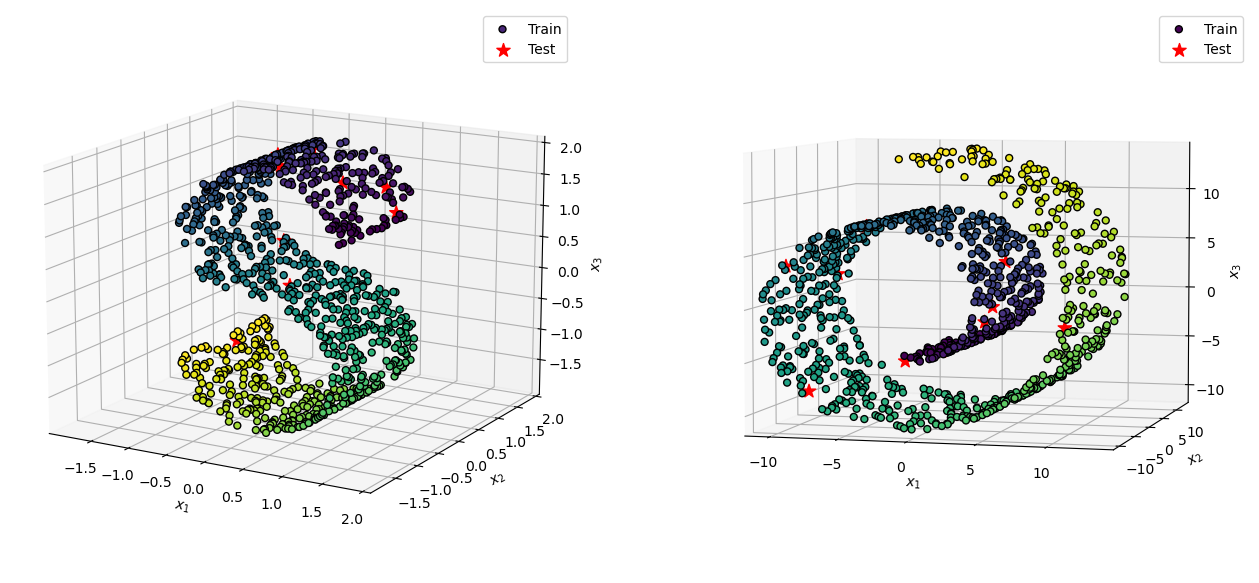

In [12]:
# Plot Data
# Pay attention how to display the train (Out of Sample) data

hF = plt.figure(figsize = (16, 8))
hA1 = hF.add_subplot(1, 2, 1, projection = '3d')
hA2 = hF.add_subplot(1, 2, 2, projection = '3d')
hA1.view_init(elev = 15, azim = 300)
hA2.view_init(elev = 5, azim = 285)

PlotTrainTestData(mX1, mY1, vCx1, vCy1, hA1, Is3DData = True)
PlotTrainTestData(mX2, mY2, vCx2, vCy2, hA2, Is3DData = True)

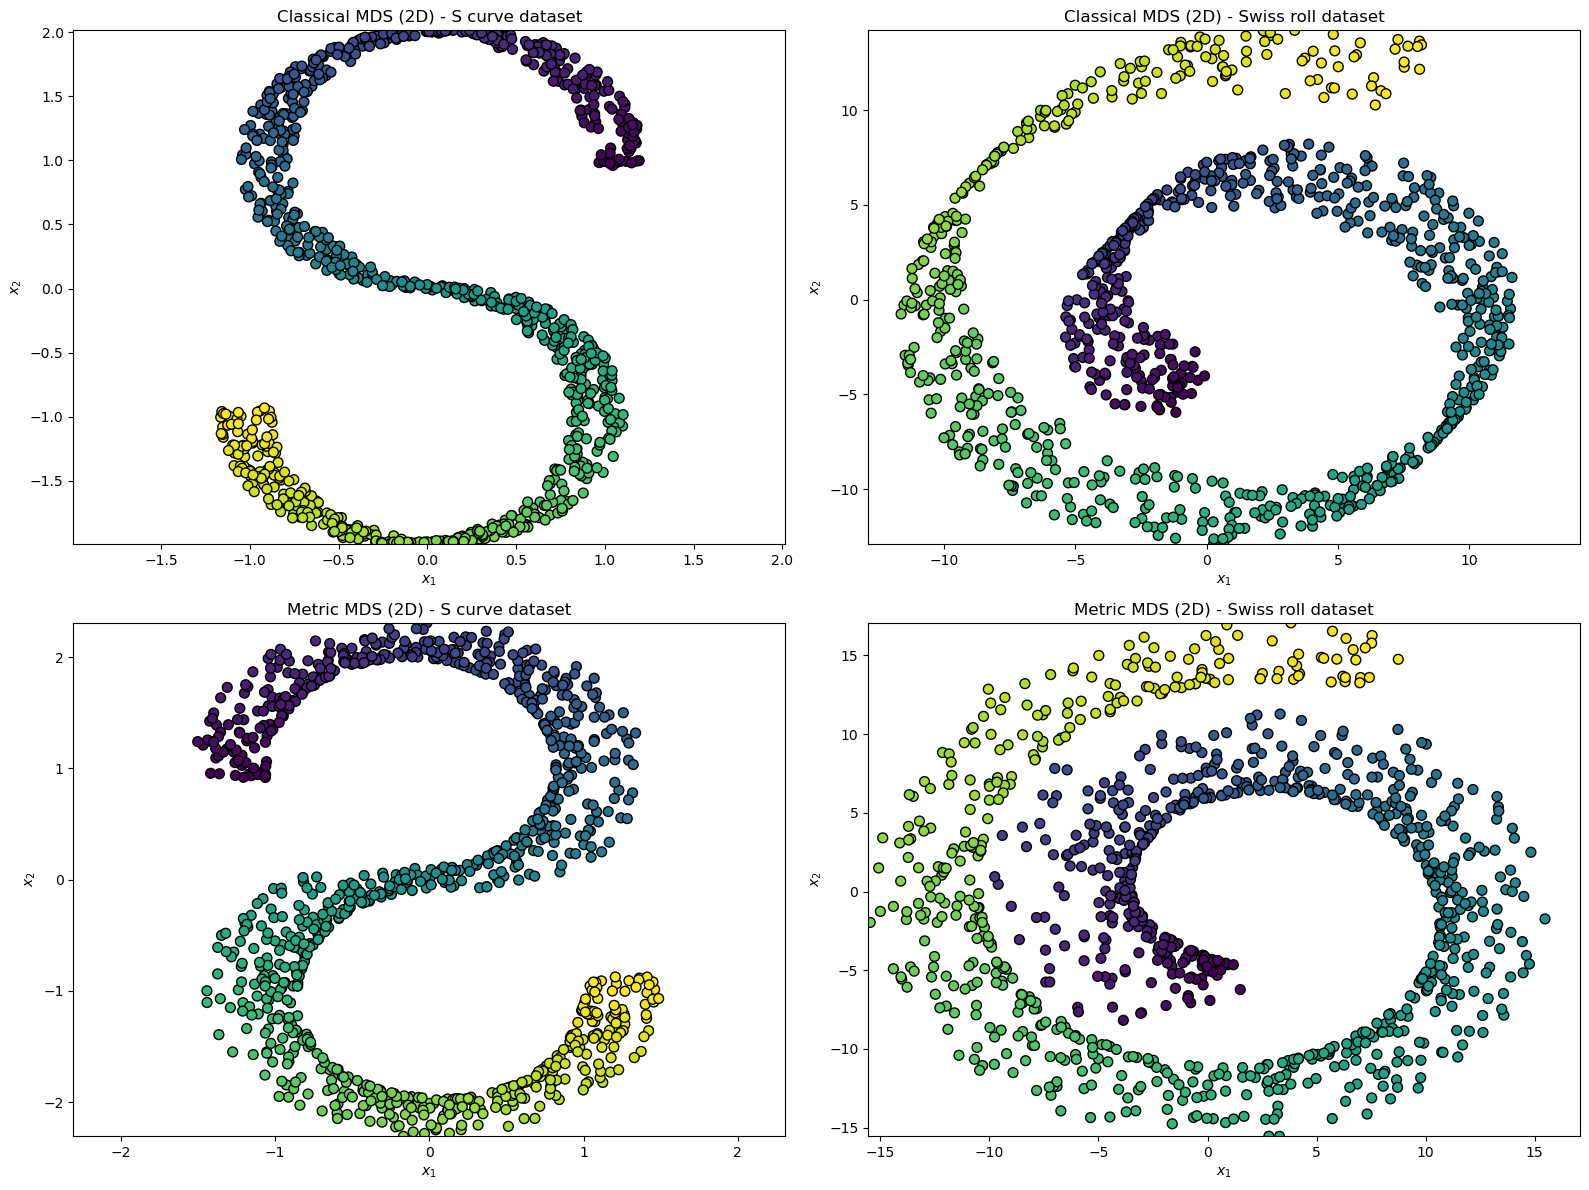

In [13]:
# Set the desired number of dimensions
d = 2

# Calculate squared distance matrices for both datasets
mX1_dist_matrix = distance_matrix(mX1, mX1)
mX1_sqrd_dist_matrix = np.square(mX1_dist_matrix)

mX2_dist_matrix = distance_matrix(mX2, mX2)
mX2_sqrd_dist_matrix = np.square(mX2_dist_matrix)

# Classical MDS for both datasets
cmds1 = CMDS(d=d)
mZx1_cmds = cmds1.fit_transform(mX1_sqrd_dist_matrix)

cmds2 = CMDS(d=d)
mZx2_cmds = cmds2.fit_transform(mX2_sqrd_dist_matrix)

# Metric MDS for both datasets
mmds = MMDS(d=d, maxIter=100, ε=1000)
mZx1_mmds = mmds.fit_transform(mX1_dist_matrix)

mZx2_mmds = mmds.fit_transform(mX2_dist_matrix)

# Create a figure to display the results
hF_mds = plt.figure(figsize=(16, 12))

# Plot results for Classical MDS on S-curve dataset
hA1_mds = hF_mds.add_subplot(2, 2, 1)
hA1_mds.set_title('Classical MDS (2D) - S curve dataset')
Plot2DScatter(mX=mZx1_cmds, hA=hA1_mds, vC=vCx1)

# Plot results for Classical MDS on Swiss roll dataset
hA2_mds = hF_mds.add_subplot(2, 2, 2)
hA2_mds.set_title('Classical MDS (2D) - Swiss roll dataset')
Plot2DScatter(mX=mZx2_cmds, hA=hA2_mds, vC=vCx2)

# Plot results for Metric MDS on S-curve dataset
hA3_mds = hF_mds.add_subplot(2, 2, 3)
hA3_mds.set_title('Metric MDS (2D) - S curve dataset')
Plot2DScatter(mX=mZx1_mmds, hA=hA3_mds, vC=vCx1)

# Plot results for Metric MDS on Swiss roll dataset
hA4_mds = hF_mds.add_subplot(2, 2, 4)
hA4_mds.set_title('Metric MDS (2D) - Swiss roll dataset')
Plot2DScatter(mX=mZx2_mmds, hA=hA4_mds, vC=vCx2)

# Show the figure with results
plt.tight_layout()
plt.show()


### 7.4. Question

1. Explain the differences / similarities between results.
2. Describe the distance function which should be used for such data.
3. What results would you expect if the distance for the Metric MDS was the _Squared Euclidean_?  
   Assume the optimal solder for this distance.

### 7.4. Solution

### 7.4. Solution

1. Classic MDS and Metric MDS both aim to preserve the fundamental shape of the original data, such as the S-curve and Swiss roll. However, they exhibit noticeable differences, particularly in terms of data density.

    Metric MDS, which minimizes the difference between pairwise distances in both high and low dimensions, effectively maintains the "width" of the original data. It ensures that the distances between points are accurately represented in the lower-dimensional space.

    Classic MDS, on the other hand, prioritizes preserving the similarity between points by selecting the largest eigenvalues from the Eigenvalue Decomposition (EVD) of the distance matrix. As a result, it appears to focus more on capturing the high variability along specific axes, like x1 and x3.

2. For datasets like these, the most appropriate distance metric would be the geodesic distance. This metric takes into account the curvature and metric structure of the manifold, making it better suited for capturing the true pairwise distances in non-linear, manifold-like data.

3. If Metric MDS were to use the Squared Euclidean distance instead of the Euclidean distance, we would expect the shapes of the data to still be preserved. However, the low-dimensional embeddings might be more widely dispersed in space. This change occurs because the loss function would no longer aim to preserve the exact pairwise distances from the high-dimensional original data but would instead focus more on the relative magnitudes of distances, leading to different spatial distributions in the lower-dimensional representation.
---

---

### 7.5. Out of Sample Extension

In this section the _out of sample extension_ of the _Classic MDS_ (Using the above class) will be applied.  
In this section the calculation of the out of sample extension will be done without using the test data samples (`mX1`, `mX2`)!

For `mY1` and `mY2`:

1. Calculate the Distance Matrix  
   Calculate `Dxy1` and `Dxy2` **without using `mX1` and `mX2`**.  
   You may use `Dxx1` and `Dxx2` in any way suitable.   
   For _Classic MDS_ use the _Squared Euclidean_ distance.  
   For _Metric MDS_ use the _Euclidean_ distance.
3. Apply the Out of Sample Extension for Classic MDS  
   On each data set, apply the Classic MDS in _out of sample extension_ mode on `mDxy1` and `mDxy2`. 
4. Plot Low Dimensional Data  
   Make a scatter plot of $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$ and color the data points according to `vCx1`, `vCx2`.   
   You should plot both the training data and the test data.
   Use `d = 2`.

* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> You may use the knowledge about the dimensions of `mX1`, `mX2`.
* <font color='brown'>(**#**)</font> In case one fails on (1) one may calculate `mDxy` using `mX` (Points will be reduced).
* <font color='brown'>(**#**)</font> The output should be 2 figures for each data set. You may show them in a single plot using sub plots.

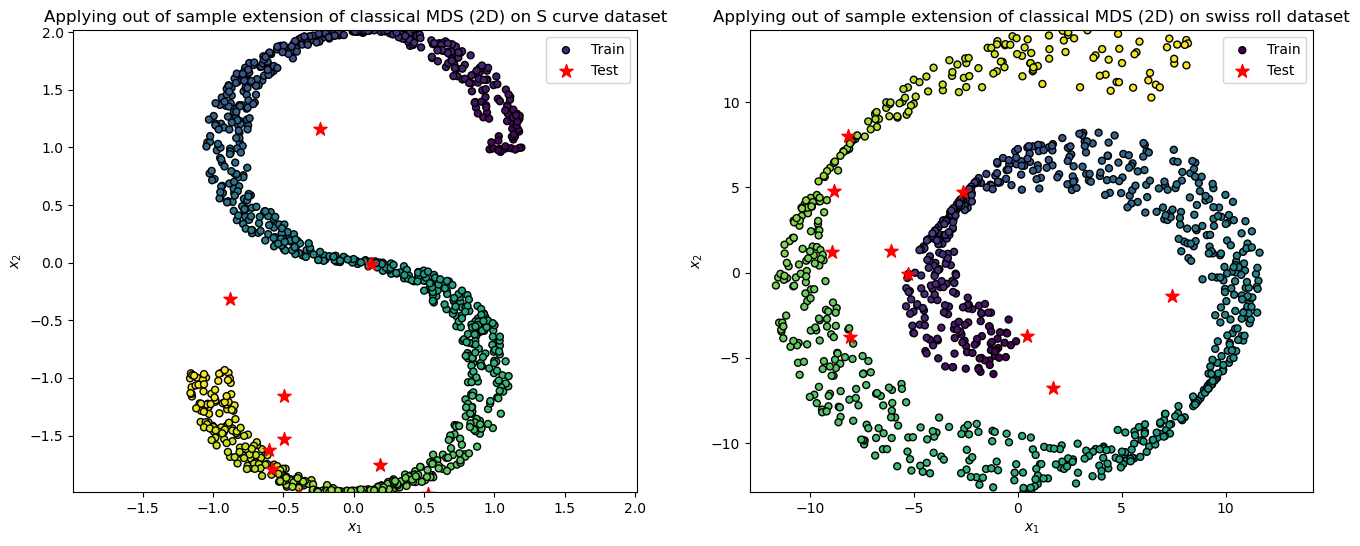

In [14]:
#===========================Fill This===========================#
# 1. Set parameter `d`.
# 2. Calculate the distance matrices of the test data per data set from `mDxx1` and `mDxx2`.
# 3. Apply Classic MDS to each data set.
#    Apply `fit()` then `transform()` on `mDxx1` and `mDxx2`.
#    Apply `transform()` on `mDxy1` and `mDxy2`.
# 4. Display results as scattered data.
#    Display both the train and test data on the same axes (See above).
# !! The output should be a figure of 1 x 2 (Row: Method, Column: Data Set).
# !! Hint: You should recover the data from `mDxx`.

d = 3

# Recover X1 and X2 using CMDS with d=3 (dimension of the original data)
mZx1_3D_cmds = CMDS(d=d).fit_transform(mX1_sqrd_dist_matrix)
mZx2_3D_cmds = CMDS(d=d).fit_transform(mX2_sqrd_dist_matrix)

# Calculate the distance matrices between the test data and restored X1 and X2
mY1_sqrd_dist_matrix = np.square(distance_matrix(mZx1_3D_cmds, mY1))
mY2_sqrd_dist_matrix = np.square(distance_matrix(mZx2_3D_cmds, mY2))

# Use the models we created in the previous question and already fitted to mDxx1 and mDxx2
# transporm given the calculated the distance matrices
mZy1_cmds = cmds1.transform(mY1_sqrd_dist_matrix)
mZy2_cmds = cmds2.transform(mY2_sqrd_dist_matrix)

# Display the results
hF_mds = plt.figure(figsize = (16, 6))

hA1_mds = hF_mds.add_subplot(1, 2, 1)
hA1_mds.set_title('Applying out of sample extension of classical MDS (2D) on S curve dataset')
PlotTrainTestData(mZx1_cmds, mZy1_cmds, vCx1, vCy1, hA1_mds, Is3DData = False)

hA2_mds = hF_mds.add_subplot(1, 2, 2)
hA2_mds.set_title('Applying out of sample extension of classical MDS (2D) on swiss roll dataset')
PlotTrainTestData(mZx2_cmds, mZy2_cmds, vCx2, vCy2, hA2_mds, Is3DData = False)
#===============================================================#

### 7.6. Question

Are the results above good?  
Will they match the results if one would calculate `mDxy` from `mX` and `mY`?  
What can be done to overcome those issues without accessing `mX` and `mY` directly?  

### 7.6. Solution

The obtained results are evidently suboptimal due to the fact that the distances were computed between the test data and the "recovered" original dataset. This recovered dataset might differ from the true original data in terms of rotation and translation. If we were to calculate the distance matrix mDxy directly from the datasets mX and mY, we would anticipate the test data to be accurately positioned. To confirm our hypothesis, we conducted a validation, as demonstrated in the subsequent code block.

---

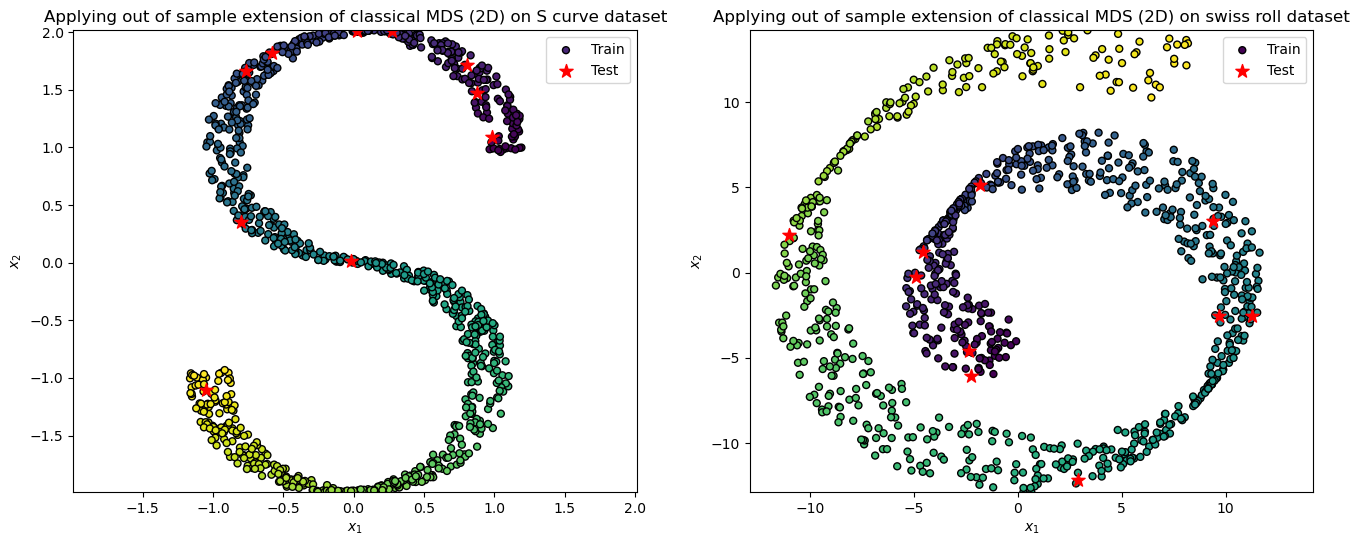

In [15]:
mY1_sqrd_dist_matrix = np.square(distance_matrix(mX1, mY1))
mY2_sqrd_dist_matrix = np.square(distance_matrix(mX2, mY2))

mZy1_cmds = cmds1.transform(mY1_sqrd_dist_matrix)
mZy2_cmds = cmds2.transform(mY2_sqrd_dist_matrix)

hF_mds = plt.figure(figsize = (16, 6))

hA1_mds = hF_mds.add_subplot(1, 2, 1)
hA1_mds.set_title('Applying out of sample extension of classical MDS (2D) on S curve dataset')
PlotTrainTestData(mZx1_cmds, mZy1_cmds, vCx1, vCy1, hA1_mds, Is3DData = False)

hA2_mds = hF_mds.add_subplot(1, 2, 2)
hA2_mds.set_title('Applying out of sample extension of classical MDS (2D) on swiss roll dataset')
PlotTrainTestData(mZx2_cmds, mZy2_cmds, vCx2, vCy2, hA2_mds, Is3DData = False)

In [16]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')

Total Run Time: 7.5178444385528564 [Sec].
